##Read dataset
The following dataset consists of these columns: 'Unnamed: 0.1', 'Unnamed: 0', 'company', 'title', 'source', 'time',
       'url', 'label_x', 'score_x', 'label_y', 'score_y', 'label_z', 'score_z',
       'zero_shot_label', 'zero_shot_score', 'Date', 'ticker',
       'environmentScore', 'socialScore', 'governanceScore', 'Open', 'High',
       'Low', 'Close', 'Adj Close', 'Volume', 'Ticker', 'Company Name',
       'ESG Rating'.

We will add the environment, social and government scores separetaly for each company.

Deletion of not important columns would be performed later.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/[DS] Seminarska/FINAL/data_with_esg.csv")

In [3]:
data.head(20)

,Unnamed: 0.1,Unnamed: 0,company,title,source,time,url,label_x,score_x,label_y,...,governanceScore,Open,High,Low,Close,Adj Close,Volume,Ticker,Company Name,ESG Rating
0,0,1,Tesla,Tesla sales plunge far more than expected,CNN,Apr 2,https://www.cnn.com/2024/04/02/business/tesla-...,NEGATIVE,0.961334,negative,...,7.85,164.750000,167.690002,163.429993,166.630005,166.630005,116650600.0,TSLA,Tesla,25.2
1,1,2,Tesla,Tesla recalling nearly 2.2M vehicles for softw...,The Associated Press,Feb 2,https://apnews.com/article/tesla-recall-icons-...,NEGATIVE,0.998407,negative,...,7.85,185.039993,188.690002,182.000000,187.910004,187.910004,110505100.0,TSLA,Tesla,25.2
2,2,3,Tesla,Samsung Announces Collaboration With Tesla at ...,samsung.com,Jan 5,https://news.samsung.com/global/samsung-announ...,POSITIVE,0.990341,neutral,...,7.85,236.860001,240.119995,234.899994,237.490005,237.490005,92379400.0,TSLA,Tesla,25.2
3,3,4,Tesla,"I drove the new Tesla Model 3, here’s what got...",TESLARATI,Feb 13,https://www.teslarati.com/tesla-model-3-highla...,NEGATIVE,0.991584,positive,...,7.85,183.990005,187.259995,182.110001,184.020004,184.020004,86759500.0,TSLA,Tesla,25.2
4,4,5,Tesla,"Tesla 1Q profit falls 55%, but stock jumps as ...",The Associated Press,Apr 23,https://apnews.com/article/tesla-future-sales-...,NEGATIVE,0.816990,negative,...,7.85,143.330002,147.259995,141.110001,144.679993,144.679993,124545100.0,TSLA,Tesla,25.2
5,5,7,Tesla,"Tesla’s earnings plunge, but the company promi...",CNN,Apr 23,https://www.cnn.com/2024/04/23/business/tesla-...,POSITIVE,0.992246,negative,...,7.85,143.330002,147.259995,141.110001,144.679993,144.679993,124545100.0,TSLA,Tesla,25.2
6,6,8,Tesla,Tesla's price cuts eat into Cybertruck maker's...,The Associated Press,"Oct 18, 2023",https://apnews.com/article/tesla-sales-electri...,NEGATIVE,0.987617,negative,...,7.85,252.699997,254.630005,242.080002,242.679993,242.679993,125147800.0,TSLA,Tesla,25.2
7,7,9,Tesla,Tesla recalls nearly all 2 million of its vehi...,CNN,"Dec 13, 2023",https://www.cnn.com/2023/12/13/tech/tesla-reca...,POSITIVE,0.854390,neutral,...,7.85,234.190002,240.300003,228.199997,239.289993,239.289993,146286300.0,TSLA,Tesla,25.2
8,8,12,Tesla,TSLA Stock Quote Price and Forecast,CNN,"Aug 30, 2023",https://www.cnn.com/markets/stocks/TSLA,NEGATIVE,0.973450,neutral,...,7.85,254.199997,260.510010,250.589996,256.899994,256.899994,121988400.0,TSLA,Tesla,25.2
9,9,13,Tesla,"Tesla sales tumble nearly 9%, most in 4 years,...",The Associated Press,Apr 2,https://apnews.com/article/tesla-sales-fall-el...,NEGATIVE,0.999517,negative,...,7.85,164.750000,167.690002,163.429993,166.630005,166.630005,116650600.0,TSLA,Tesla,25.2


In [4]:
data.describe()

,Unnamed: 0.1,Unnamed: 0,score_x,score_y,score_z,zero_shot_score,environmentScore,socialScore,governanceScore,Open,High,Low,Close,Adj Close,Volume,ESG Rating
count,3375.000000,3375.000000,3375.000000,3375.000000,3375.000000,3375.000000,3375.000000,3375.000000,3375.000000,3375.000000,3375.000000,3375.000000,3375.000000,3375.000000,3.375000e+03,3375.000000
mean,1687.000000,2069.064593,0.949783,0.972521,0.878971,0.510764,4.012874,10.357286,8.037141,2053.985592,2070.309028,2034.954426,2051.895714,2042.963911,3.117240e+07,22.409126
std,974.422906,1227.409822,0.098340,0.082066,0.129732,0.153999,4.168696,3.733550,2.287802,11622.762337,11712.070350,11516.992031,11611.024151,11563.228601,9.116992e+07,6.806199
min,0.000000,1.000000,0.500508,0.377554,0.352958,0.256349,0.000000,4.900000,3.760000,25.740000,26.360001,25.719999,26.309999,25.762402,1.248000e+05,12.200000
25%,843.500000,1005.500000,0.961568,0.995116,0.825347,0.393145,1.460000,7.500000,6.340000,91.140000,92.565002,90.202500,91.719998,91.362961,3.495193e+06,16.700000
50%,1687.000000,2063.000000,0.992182,0.999551,0.938290,0.478069,2.400000,9.800000,7.100000,171.000000,172.850006,169.449997,171.100006,170.179993,7.601100e+06,21.600000
75%,2530.500000,3177.500000,0.998297,0.999858,0.974083,0.604709,6.000000,12.560000,9.700000,342.475006,346.540008,340.375000,342.860001,340.492981,2.010600e+07,28.300000
max,3374.000000,4141.000000,0.999881,0.999898,0.990477,0.987198,18.600000,21.090000,14.800000,87900.000000,88600.000000,87100.000000,87800.000000,87800.000000,1.156044e+09,36.600000


In [5]:
data.shape

(3375, 29)

In [6]:
data.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'company', 'title', 'source', 'time',
       'url', 'label_x', 'score_x', 'label_y', 'score_y', 'label_z', 'score_z',
       'zero_shot_label', 'zero_shot_score', 'Date', 'ticker',
       'environmentScore', 'socialScore', 'governanceScore', 'Open', 'High',
       'Low', 'Close', 'Adj Close', 'Volume', 'Ticker', 'Company Name',
       'ESG Rating'],
      dtype='object')

Check which companies the dataset consists of.

In [7]:
data['company'].unique()

array(['Tesla', 'Apple', 'Microsoft', 'Amazon', 'Google', 'Meta',
       'Netflix', 'NVIDIA', 'IBM', 'AbbVie', 'Adobe', 'Alibaba',
       'American', 'Bank', 'Berkshire', 'Broadcom', 'Caterpillar',
       'Chevron', 'Coca-Cola', 'Comcast', 'Costco', 'Eli_Lilly',
       'Home_Depot', 'JPMorgan_Chase', 'LVMH', 'Mastercard', 'McDonald',
       'Merck', 'Nike', 'Walt_Disney', 'Oracle', 'Procter', 'Samsung',
       'Shell', 'Tencent', 'Toyota', 'Unilever', 'UnitedHealth', 'Visa',
       'Walmart', 'Intel'], dtype=object)

In [14]:
import numpy as np
len(np.unique(data['company']))

41

Check for missing values.

In [15]:
data.isnull().sum() / len(data)

Unnamed: 0.1        0.0
Unnamed: 0          0.0
company             0.0
title               0.0
source              0.0
time                0.0
url                 0.0
label_x             0.0
score_x             0.0
label_y             0.0
score_y             0.0
label_z             0.0
score_z             0.0
zero_shot_label     0.0
zero_shot_score     0.0
Date                0.0
ticker              0.0
environmentScore    0.0
socialScore         0.0
governanceScore     0.0
Open                0.0
High                0.0
Low                 0.0
Close               0.0
Adj Close           0.0
Volume              0.0
Ticker              0.0
Company Name        0.0
ESG Rating          0.0
dtype: float64

##Data preprocessing

We will drop rows for Samsung because the stock market prices are not in the right currency.

In [17]:
num_samsung_rows = data[data['company'] == 'Samsung'].shape[0]
print(num_samsung_rows)

81


In [22]:
initial_num_rows = data.shape[0]
print(initial_num_rows)

3375


In [23]:
data = data[data['company'] != 'Samsung']

In [27]:
print(initial_num_rows - data.shape[0])

81


Drop unneccessary columns.

In [29]:
columns_to_drop = ['Unnamed: 0.1', 'Unnamed: 0','time',
       'url', 'score_x', 'label_y', 'score_y', 'label_z', 'score_z',
       'zero_shot_score',]

In [35]:
data = data.drop(columns=columns_to_drop, errors='ignore')

The main idea is to generate new datasets for each company. Each dataset should consist of stock market prices, percentage of positive environment news, percentage of negative environment news, percentage of positive social news, percentage of negative social news, percentage of positive government news, percentage of negative government news, percentage of positive neutral news, and percentage of negative neutral news for each day from July 2023 to August 2024. It is possible that for some days there won't be any data.

We will use the label_x column as indicator if the news title is positive or negative.

These datasets will be merged later and used as input to the XGBoost model.

---

In [41]:
companies_list = data['company'].unique()
print(companies_list)

num_companies = data['company'].nunique()
print(num_companies)

['Tesla' 'Apple' 'Microsoft' 'Amazon' 'Google' 'Meta' 'Netflix' 'NVIDIA'
 'IBM' 'AbbVie' 'Adobe' 'Alibaba' 'American' 'Bank' 'Berkshire' 'Broadcom'
 'Caterpillar' 'Chevron' 'Coca-Cola' 'Comcast' 'Costco' 'Eli_Lilly'
 'Home_Depot' 'JPMorgan_Chase' 'LVMH' 'Mastercard' 'McDonald' 'Merck'
 'Nike' 'Walt_Disney' 'Oracle' 'Procter' 'Shell' 'Tencent' 'Toyota'
 'Unilever' 'UnitedHealth' 'Visa' 'Walmart' 'Intel']
40


In [44]:
import pandas as pd
from collections import Counter

# List of companies in the dataset
companies = companies_list

# Iterate through each company in data
for company_name in companies:
    # Filter data for the current company
    company_news = data[data['company'] == company_name]

    # Group by 'date' and 'type', aggregate sentiment scores and count news types
    grouped_data = company_news.groupby(['Date', 'zero_shot_label']).agg({
        'label_x': lambda x: Counter(x),
        'zero_shot_label': 'count'
    }).rename(columns={'zero_shot_label': 'type_count'}).reset_index()

    # Initialize new columns for percentages
    grouped_data['negative_percentage'] = 0.0
    grouped_data['positive_percentage'] = 0.0

    # Iterate through the rows to calculate the percentages
    for i, row in grouped_data.iterrows():
        sentiment_dict = row['label_x']

        # Get the counts of NEGATIVE and POSITIVE sentiments
        negative_count = sentiment_dict.get('NEGATIVE', 0)
        positive_count = sentiment_dict.get('POSITIVE', 0)
        total_count = row['type_count']

        # Calculate the percentages and assign to the new columns
        if total_count > 0:
            grouped_data.at[i, 'negative_percentage'] = (negative_count / total_count) * 100
            grouped_data.at[i, 'positive_percentage'] = (positive_count / total_count) * 100

    # Pivot the DataFrame to get each type as separate columns for negative and positive percentages
    pivot_df = grouped_data.pivot(index='Date', columns='zero_shot_label', values=['negative_percentage', 'positive_percentage'])

    # Flatten the multi-level column names
    pivot_df.columns = [f"{col[1]}_{col[0]}" for col in pivot_df.columns]

    # Reset the index to bring 'Date' back as a column
    pivot_df = pivot_df.reset_index()

    # Merge with original data for the company
    final_data = pd.merge(company_news, pivot_df, on=['Date'])

    # Save the resulting DataFrame to CSV
    output_file = f"/content/drive/MyDrive/Colab Notebooks/[DS] Seminarska/FINAL/Companies datasets/{company_name}-data.csv"
    final_data.to_csv(output_file, index=False)

    # Print a sample of the resulting DataFrame
    print(f"Processed {company_name} data:")
    print(pivot_df.head())

Processed Tesla data:
         Date  environment_negative_percentage  \
0  2023-08-28                              NaN   
1  2023-08-30                              NaN   
2  2023-09-01                              0.0   
3  2023-09-07                              NaN   
4  2023-09-08                              0.0   

   government_negative_percentage  neutral_negative_percentage  \
0                             NaN                          NaN   
1                             NaN                        100.0   
2                             NaN                          NaN   
3                             NaN                          NaN   
4                             NaN                          NaN   

   social_negative_percentage  environment_positive_percentage  \
0                       100.0                              NaN   
1                         0.0                              NaN   
2                         NaN                            100.0   
3               

Read the datasets

In [64]:
import os

# Directory where CSV files are saved
path = "/content/drive/MyDrive/Colab Notebooks/[DS] Seminarska/FINAL/Companies datasets/"

datasets = []
datasets_dic = {}

# Iterate through each company and read the corresponding CSV file
for company_name in companies:
    # Replace invalid characters for variable names
    safe_name = company_name.replace('-', '_').replace(' ', '_')

    file_path = os.path.join(path, f"{company_name}-data.csv")

    # Create a variable name dynamically
    var_name = f"{safe_name}_data"

    datasets.append(var_name)

    df = pd.read_csv(file_path)
    datasets_dic[company_name] = df


    # Read the CSV file into a DataFrame and assign to the dynamically created variable
    exec(f"{var_name} = pd.read_csv('{file_path}')")

In [65]:
datasets

['Tesla_data',
 'Apple_data',
 'Microsoft_data',
 'Amazon_data',
 'Google_data',
 'Meta_data',
 'Netflix_data',
 'NVIDIA_data',
 'IBM_data',
 'AbbVie_data',
 'Adobe_data',
 'Alibaba_data',
 'American_data',
 'Bank_data',
 'Berkshire_data',
 'Broadcom_data',
 'Caterpillar_data',
 'Chevron_data',
 'Coca_Cola_data',
 'Comcast_data',
 'Costco_data',
 'Eli_Lilly_data',
 'Home_Depot_data',
 'JPMorgan_Chase_data',
 'LVMH_data',
 'Mastercard_data',
 'McDonald_data',
 'Merck_data',
 'Nike_data',
 'Walt_Disney_data',
 'Oracle_data',
 'Procter_data',
 'Shell_data',
 'Tencent_data',
 'Toyota_data',
 'Unilever_data',
 'UnitedHealth_data',
 'Visa_data',
 'Walmart_data',
 'Intel_data']

In [66]:
Tesla_data.head()

,company,title,source,label_x,zero_shot_label,Date,ticker,environmentScore,socialScore,governanceScore,...,Company Name,ESG Rating,environment_negative_percentage,government_negative_percentage,neutral_negative_percentage,social_negative_percentage,environment_positive_percentage,government_positive_percentage,neutral_positive_percentage,social_positive_percentage
0,Tesla,Tesla sales plunge far more than expected,CNN,NEGATIVE,social,2024-04-02,TSLA,3.31,14.08,7.85,...,Tesla,25.2,100.0,NaN,NaN,100.0,0.0,NaN,NaN,0.0
1,Tesla,"Tesla sales tumble nearly 9%, most in 4 years,...",The Associated Press,NEGATIVE,environment,2024-04-02,TSLA,3.31,14.08,7.85,...,Tesla,25.2,100.0,NaN,NaN,100.0,0.0,NaN,NaN,0.0
2,Tesla,Tesla shares fall after deliveries drop 8.5% f...,CNBC,NEGATIVE,environment,2024-04-02,TSLA,3.31,14.08,7.85,...,Tesla,25.2,100.0,NaN,NaN,100.0,0.0,NaN,NaN,0.0
3,Tesla,Tesla quarterly deliveries decline for the fir...,Reuters,NEGATIVE,environment,2024-04-02,TSLA,3.31,14.08,7.85,...,Tesla,25.2,100.0,NaN,NaN,100.0,0.0,NaN,NaN,0.0
4,Tesla,"Tesla’s Sales Drop, a Sign That Its Grip on th...",The New York Times,NEGATIVE,environment,2024-04-02,TSLA,3.31,14.08,7.85,...,Tesla,25.2,100.0,NaN,NaN,100.0,0.0,NaN,NaN,0.0


##Merge datasets

In [67]:
for company, df in datasets_dic.items():
    print(f"Missing values for {company}:")
    missing_values = df.isnull().sum() / len(df) * 100  # Percentage of missing values
    print(missing_values)
    print('-' * 40)  # Divider for better readability

Missing values for Tesla:
company                             0.000000
title                               0.000000
source                              0.000000
label_x                             0.000000
zero_shot_label                     0.000000
Date                                0.000000
ticker                              0.000000
environmentScore                    0.000000
socialScore                         0.000000
governanceScore                     0.000000
Open                                0.000000
High                                0.000000
Low                                 0.000000
Close                               0.000000
Adj Close                           0.000000
Volume                              0.000000
Ticker                              0.000000
Company Name                        0.000000
ESG Rating                          0.000000
environment_negative_percentage    81.318681
government_negative_percentage     74.725275
neutral_negative_percentage  

Fill NULL values with mean.

In [70]:
# Directory where CSV files are saved
path = "/content/drive/MyDrive/Colab Notebooks/[DS] Seminarska/FINAL/Companies datasets imputed/"
# Loop through each dataset
for company, df in datasets_dic.items():
    # Fill missing values in numeric columns with column mean
    df.fillna(df.select_dtypes(include='number').mean(), inplace=True)

    # Save the modified DataFrame to a CSV file
    file_path = os.path.join(path, f"{company}-filled.csv")
    df.to_csv(file_path, index=False)

    print(f"Missing values filled and saved for {company} at {file_path}")
    print('-' * 40)

Missing values filled and saved for Tesla at /content/drive/MyDrive/Colab Notebooks/[DS] Seminarska/FINAL/Companies datasets imputed/Tesla-filled.csv
----------------------------------------
Missing values filled and saved for Apple at /content/drive/MyDrive/Colab Notebooks/[DS] Seminarska/FINAL/Companies datasets imputed/Apple-filled.csv
----------------------------------------
Missing values filled and saved for Microsoft at /content/drive/MyDrive/Colab Notebooks/[DS] Seminarska/FINAL/Companies datasets imputed/Microsoft-filled.csv
----------------------------------------
Missing values filled and saved for Amazon at /content/drive/MyDrive/Colab Notebooks/[DS] Seminarska/FINAL/Companies datasets imputed/Amazon-filled.csv
----------------------------------------
Missing values filled and saved for Google at /content/drive/MyDrive/Colab Notebooks/[DS] Seminarska/FINAL/Companies datasets imputed/Google-filled.csv
----------------------------------------
Missing values filled and saved f

In [71]:
datasets

['Tesla_data',
 'Apple_data',
 'Microsoft_data',
 'Amazon_data',
 'Google_data',
 'Meta_data',
 'Netflix_data',
 'NVIDIA_data',
 'IBM_data',
 'AbbVie_data',
 'Adobe_data',
 'Alibaba_data',
 'American_data',
 'Bank_data',
 'Berkshire_data',
 'Broadcom_data',
 'Caterpillar_data',
 'Chevron_data',
 'Coca_Cola_data',
 'Comcast_data',
 'Costco_data',
 'Eli_Lilly_data',
 'Home_Depot_data',
 'JPMorgan_Chase_data',
 'LVMH_data',
 'Mastercard_data',
 'McDonald_data',
 'Merck_data',
 'Nike_data',
 'Walt_Disney_data',
 'Oracle_data',
 'Procter_data',
 'Shell_data',
 'Tencent_data',
 'Toyota_data',
 'Unilever_data',
 'UnitedHealth_data',
 'Visa_data',
 'Walmart_data',
 'Intel_data']

##Data visualisations for Tesla_data dataset

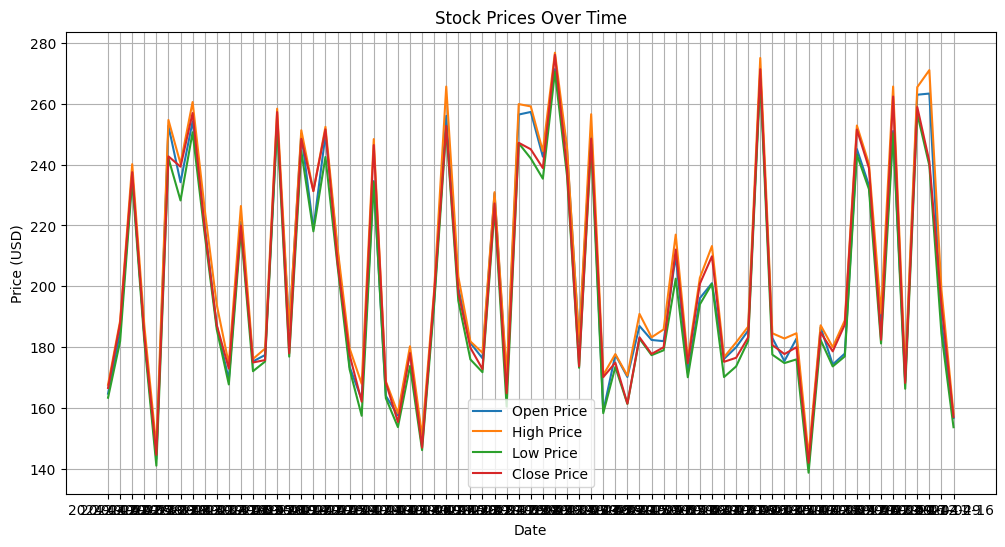

In [72]:
import matplotlib.pyplot as plt

# Plot Open, High, Low, Close prices over time
plt.figure(figsize=(12, 6))
plt.plot(Tesla_data['Date'], Tesla_data['Open'], label='Open Price')
plt.plot(Tesla_data['Date'], Tesla_data['High'], label='High Price')
plt.plot(Tesla_data['Date'], Tesla_data['Low'], label='Low Price')
plt.plot(Tesla_data['Date'], Tesla_data['Close'], label='Close Price')

plt.title('Stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

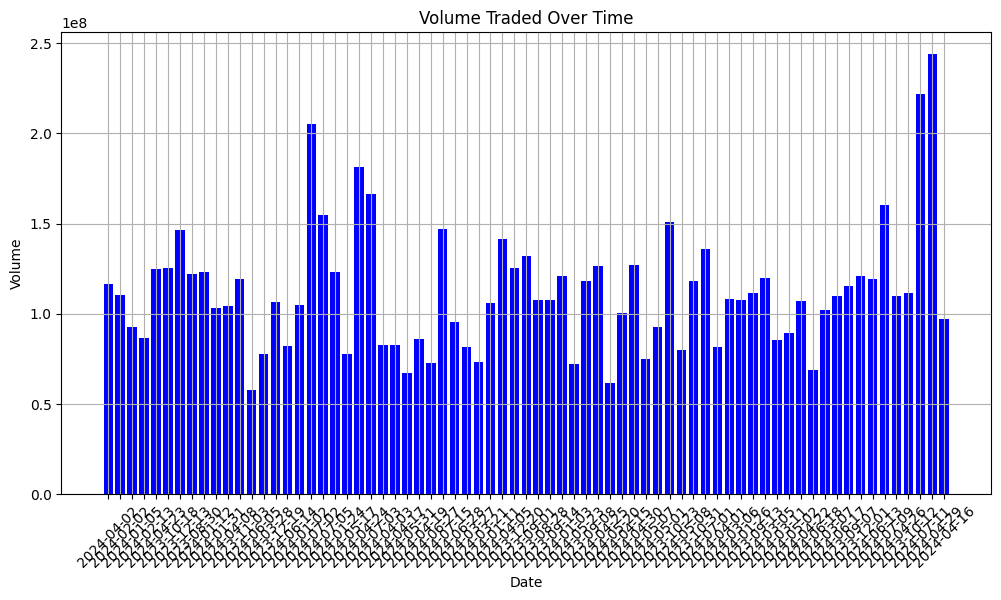

In [73]:
# Bar plot for volume traded
plt.figure(figsize=(12, 6))
plt.bar(Tesla_data['Date'], Tesla_data['Volume'], color='blue')

plt.title('Volume Traded Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

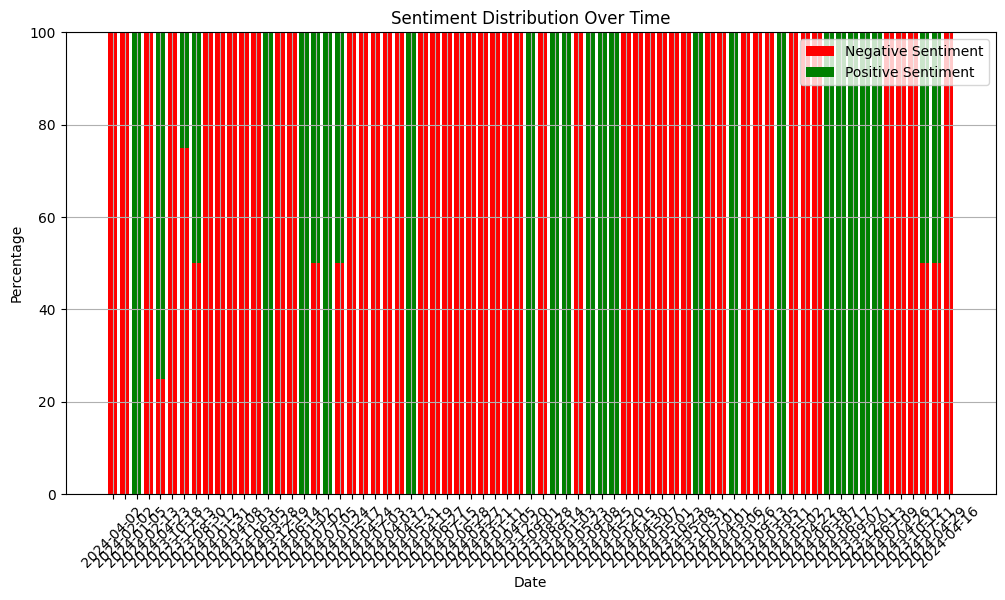

In [74]:
# Stacked bar plot for sentiment percentages without adding new columns

sentiment_cols_negative = ['environment_negative_percentage', 'government_negative_percentage', 'neutral_negative_percentage', 'social_negative_percentage']
sentiment_cols_positive = ['environment_positive_percentage', 'government_positive_percentage', 'neutral_positive_percentage', 'social_positive_percentage']

# Calculate the averages for negative and positive sentiments directly within the plot
plt.figure(figsize=(12, 6))

# Plot Negative Sentiment
plt.bar(Tesla_data['Date'], Tesla_data[sentiment_cols_negative].mean(axis=1), label='Negative Sentiment', color='red')

# Plot Positive Sentiment, stacked on top of the Negative Sentiment
plt.bar(Tesla_data['Date'], Tesla_data[sentiment_cols_positive].mean(axis=1),
        bottom=Tesla_data[sentiment_cols_negative].mean(axis=1), label='Positive Sentiment', color='green')

# Customize the plot
plt.title('Sentiment Distribution Over Time')
plt.xlabel('Date')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

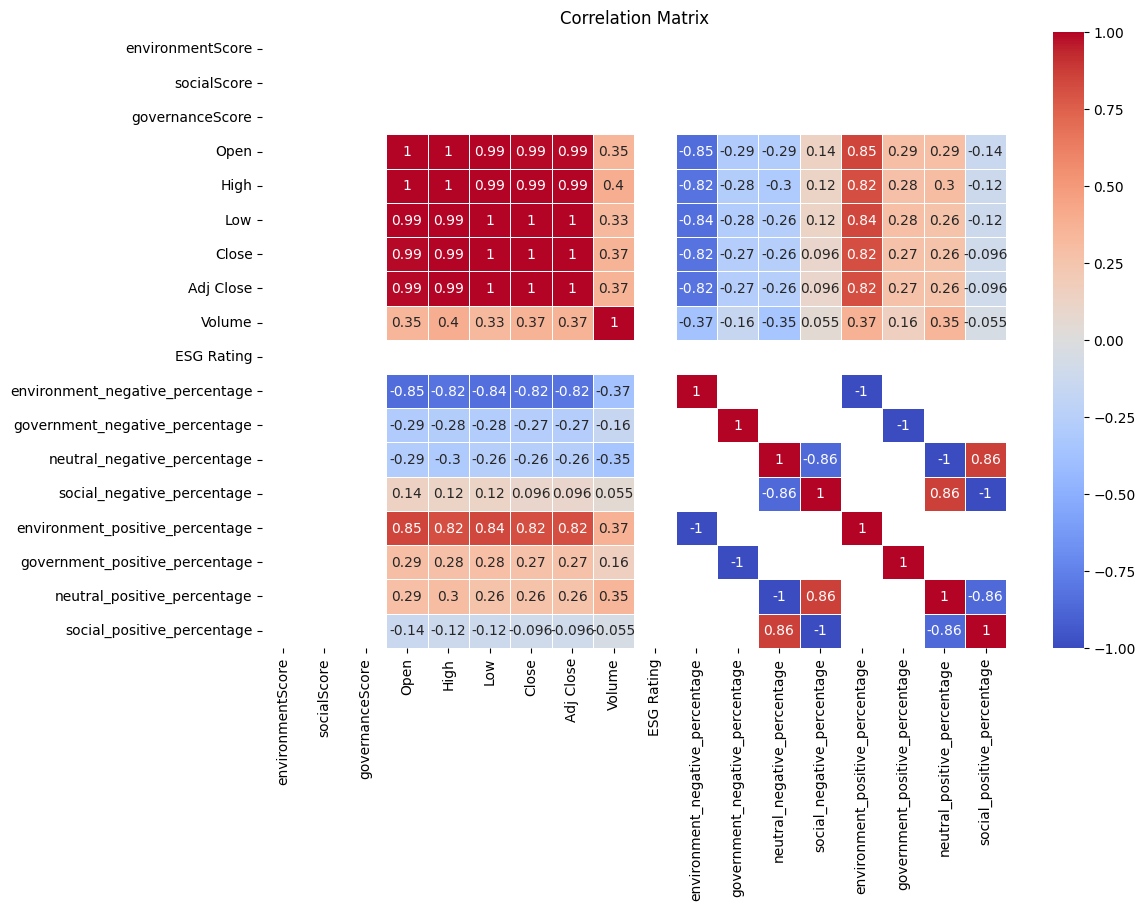

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns to compute the correlation matrix
numeric_df = Tesla_data.select_dtypes(include=['float64', 'int64'])

# Correlation matrix
corr_matrix_all = numeric_df.corr()

# Plotting the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix_all, annot=True, cmap='coolwarm', linewidths=0.5)

plt.title('Correlation Matrix')
plt.show()

There is no colleration between the news sentiment and ESG score indexes in this dataset.